In [1]:
from google.colab import files
uploaded = files.upload()


Saving breast-cancer.csv to breast-cancer.csv


In [2]:
import pandas as pd
import io

# Load the uploaded file
df = pd.read_csv(io.BytesIO(uploaded['breast-cancer.csv']))
df.head()


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [3]:
# Drop ID column if it exists
if 'id' in df.columns:
    df = df.drop(columns=['id'])

# Encode target variable: M = 1, B = 0
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})

# Check for null values
df.isnull().sum()


,0
diagnosis,0
radius_mean,0
texture_mean,0
perimeter_mean,0
area_mean,0
smoothness_mean,0
compactness_mean,0
concavity_mean,0
concave points_mean,0
symmetry_mean,0


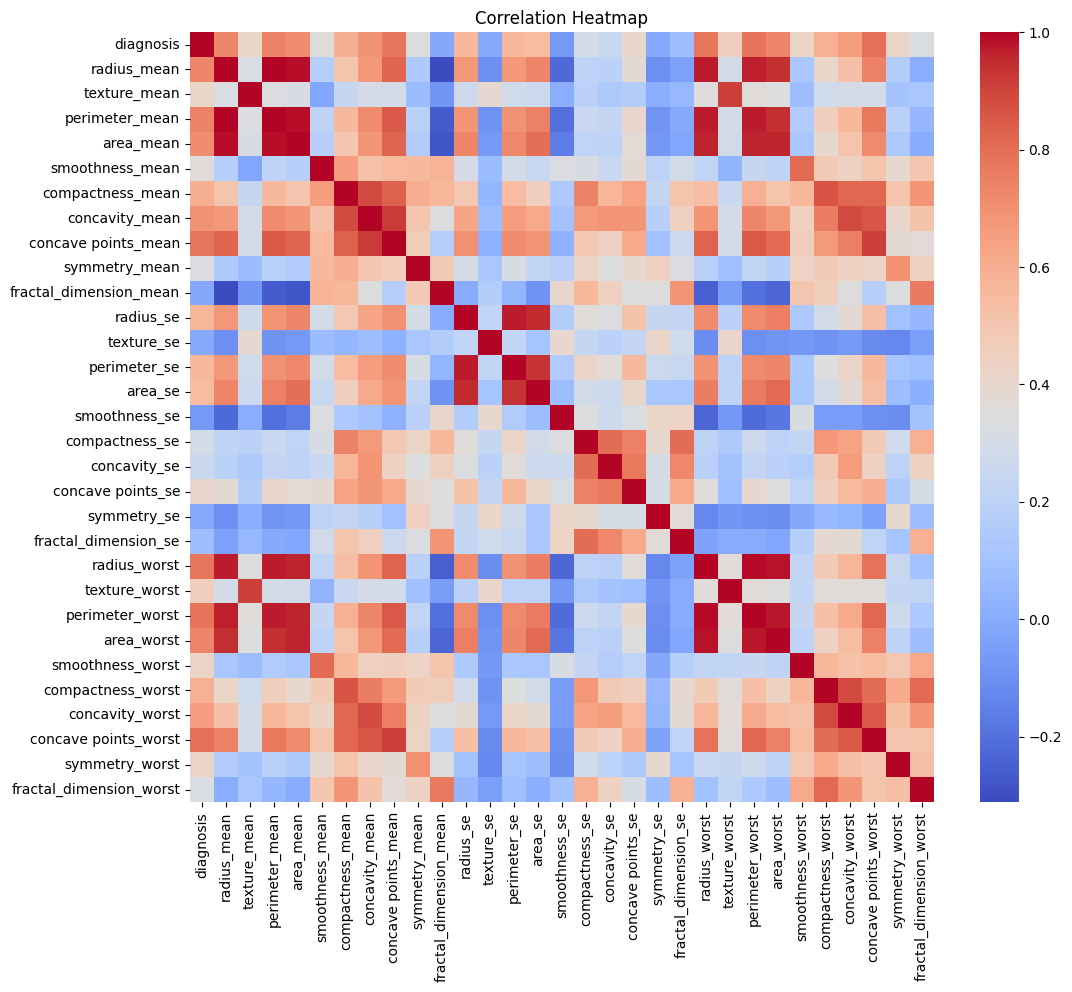

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot correlation heatmap
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(), cmap='coolwarm', annot=False)
plt.title("Correlation Heatmap")
plt.show()


In [5]:
from sklearn.model_selection import train_test_split

X = df.drop('diagnosis', axis=1)
y = df['diagnosis']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [6]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
rf_preds = rf.predict(X_test)
rf_acc = accuracy_score(y_test, rf_preds)

print("Random Forest Accuracy:", rf_acc)
print("Confusion Matrix:\n", confusion_matrix(y_test, rf_preds))


Random Forest Accuracy: 0.9649122807017544
Confusion Matrix:
 [[70  1]
 [ 3 40]]


In [7]:
from sklearn.ensemble import AdaBoostClassifier

ab = AdaBoostClassifier(random_state=42)
ab.fit(X_train, y_train)
ab_preds = ab.predict(X_test)
ab_acc = accuracy_score(y_test, ab_preds)

print("AdaBoost Accuracy:", ab_acc)
print("Confusion Matrix:\n", confusion_matrix(y_test, ab_preds))


AdaBoost Accuracy: 0.9649122807017544
Confusion Matrix:
 [[70  1]
 [ 3 40]]


In [8]:
from xgboost import XGBClassifier

xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb.fit(X_train, y_train)
xgb_preds = xgb.predict(X_test)
xgb_acc = accuracy_score(y_test, xgb_preds)

print("XGBoost Accuracy:", xgb_acc)
print("Confusion Matrix:\n", confusion_matrix(y_test, xgb_preds))


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [12:03:20] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBoost Accuracy: 0.956140350877193
Confusion Matrix:
 [[69  2]
 [ 3 40]]


In [9]:
results = pd.DataFrame({
    'Model': ['Random Forest', 'AdaBoost', 'XGBoost'],
    'Accuracy': [rf_acc, ab_acc, xgb_acc]
})
results


,Model,Accuracy
0,Random Forest,0.964912
1,AdaBoost,0.964912
2,XGBoost,0.956140


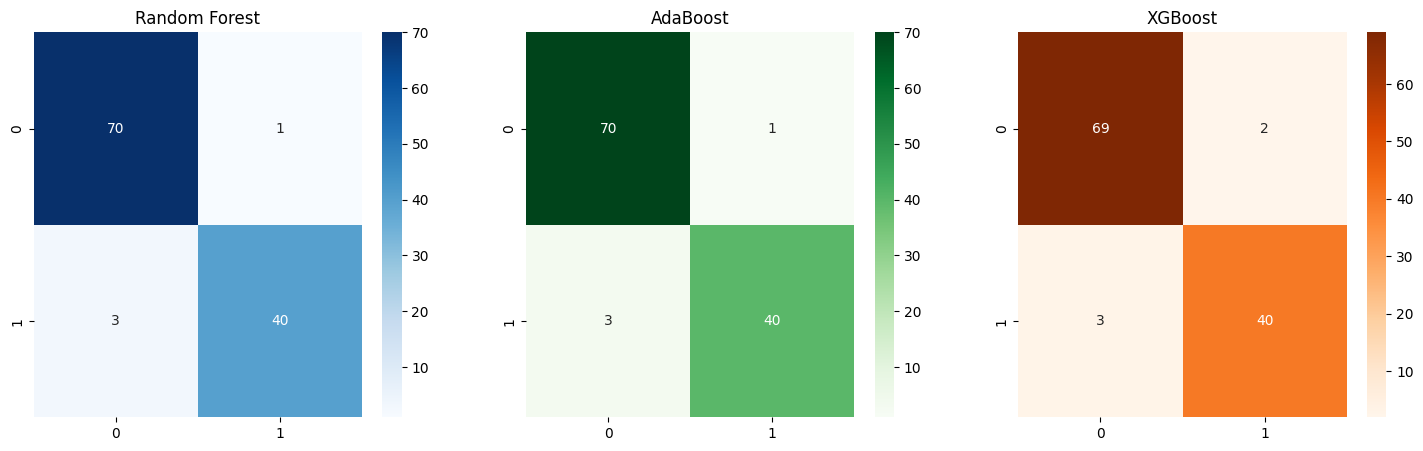

In [10]:
fig, axs = plt.subplots(1, 3, figsize=(18, 5))

sns.heatmap(confusion_matrix(y_test, rf_preds), annot=True, fmt='d', ax=axs[0], cmap='Blues')
axs[0].set_title("Random Forest")

sns.heatmap(confusion_matrix(y_test, ab_preds), annot=True, fmt='d', ax=axs[1], cmap='Greens')
axs[1].set_title("AdaBoost")

sns.heatmap(confusion_matrix(y_test, xgb_preds), annot=True, fmt='d', ax=axs[2], cmap='Oranges')
axs[2].set_title("XGBoost")

plt.show()
